In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load and process the data

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [4]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
y = pd.Series(data=df['#Passengers'].values, index=df['Month'])

In [6]:
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

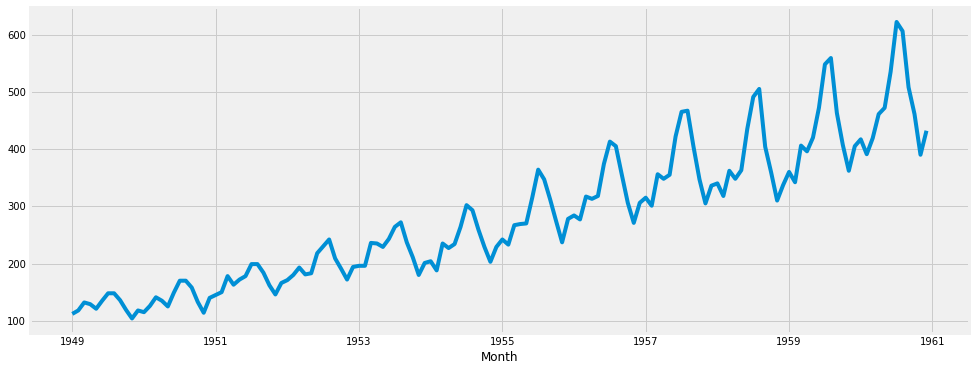

In [7]:
y.plot(figsize=(15, 6))
plt.show()

# Grid search the p, d, q parameters

In [8]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [9]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 1886.7694868585136
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 1498.2861801517845
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 1156.2914901508518
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 1016.136279733628
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 942.1856088448575
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 834.3017303458444
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 1118.6259190717344
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 1107.256204323372
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 1014.6452265989703
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 1109.2437994445113
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 1033.6172166729662
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 904.4213211127818
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 974.4396269851046
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 940.2370895732362
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 835.2218829025059
ARIMA(0, 0, 0) x (2, 0, 0, 12) - AIC: 1024.7669132306016
ARIMA(0, 0, 0) x (2, 0, 1, 12) - AIC: 1020.0651965652107
ARIMA(0, 0, 0) x (2, 0, 2, 12) - AIC: 1

ARIMA(0, 1, 2) x (1, 2, 2, 12) - AIC: 728.390965437872
ARIMA(0, 1, 2) x (2, 0, 0, 12) - AIC: 918.4251433141908
ARIMA(0, 1, 2) x (2, 0, 1, 12) - AIC: 920.0741266341663
ARIMA(0, 1, 2) x (2, 0, 2, 12) - AIC: 896.4411961391435
ARIMA(0, 1, 2) x (2, 1, 0, 12) - AIC: 849.1077294091838
ARIMA(0, 1, 2) x (2, 1, 1, 12) - AIC: 850.8143234754552
ARIMA(0, 1, 2) x (2, 1, 2, 12) - AIC: 822.9785187470449
ARIMA(0, 1, 2) x (2, 2, 0, 12) - AIC: 770.1665719058585
ARIMA(0, 1, 2) x (2, 2, 1, 12) - AIC: 754.8857807881601
ARIMA(0, 1, 2) x (2, 2, 2, 12) - AIC: 729.0187073248276
ARIMA(0, 2, 0) x (0, 0, 1, 12) - AIC: 1243.6526185784837
ARIMA(0, 2, 0) x (0, 0, 2, 12) - AIC: 1098.1903530335046
ARIMA(0, 2, 0) x (0, 1, 1, 12) - AIC: 1040.581589517293
ARIMA(0, 2, 0) x (0, 1, 2, 12) - AIC: 940.0032780557184
ARIMA(0, 2, 0) x (0, 2, 1, 12) - AIC: 959.8188392350966
ARIMA(0, 2, 0) x (0, 2, 2, 12) - AIC: 843.7329068662124
ARIMA(0, 2, 0) x (1, 0, 0, 12) - AIC: 1151.294110468074
ARIMA(0, 2, 0) x (1, 0, 1, 12) - AIC: 1137.7894

ARIMA(1, 0, 2) x (0, 1, 2, 12) - AIC: 836.4811525976711
ARIMA(1, 0, 2) x (0, 2, 0, 12) - AIC: 993.8462787304911
ARIMA(1, 0, 2) x (0, 2, 1, 12) - AIC: 832.6688985550053
ARIMA(1, 0, 2) x (0, 2, 2, 12) - AIC: 731.8305271469176
ARIMA(1, 0, 2) x (1, 0, 0, 12) - AIC: 1010.705801373434
ARIMA(1, 0, 2) x (1, 0, 1, 12) - AIC: 984.2779181583528
ARIMA(1, 0, 2) x (1, 0, 2, 12) - AIC: 903.6225318016213
ARIMA(1, 0, 2) x (1, 1, 0, 12) - AIC: 937.696186927952
ARIMA(1, 0, 2) x (1, 1, 1, 12) - AIC: 929.5691069578136
ARIMA(1, 0, 2) x (1, 1, 2, 12) - AIC: 825.1236832022549
ARIMA(1, 0, 2) x (1, 2, 0, 12) - AIC: 868.254964394125
ARIMA(1, 0, 2) x (1, 2, 1, 12) - AIC: 829.8985460395478
ARIMA(1, 0, 2) x (1, 2, 2, 12) - AIC: 733.8283090994445
ARIMA(1, 0, 2) x (2, 0, 0, 12) - AIC: 915.3744991564073
ARIMA(1, 0, 2) x (2, 0, 1, 12) - AIC: 916.8867888014805
ARIMA(1, 0, 2) x (2, 0, 2, 12) - AIC: 900.9884902453448
ARIMA(1, 0, 2) x (2, 1, 0, 12) - AIC: 849.827873777854
ARIMA(1, 0, 2) x (2, 1, 1, 12) - AIC: 848.065189263

ARIMA(1, 2, 1) x (1, 2, 2, 12) - AIC: 731.7922172984969
ARIMA(1, 2, 1) x (2, 0, 0, 12) - AIC: 912.2132872814965
ARIMA(1, 2, 1) x (2, 0, 1, 12) - AIC: 914.207373818636
ARIMA(1, 2, 1) x (2, 0, 2, 12) - AIC: 905.7017500926311
ARIMA(1, 2, 1) x (2, 1, 0, 12) - AIC: 839.1221340835418
ARIMA(1, 2, 1) x (2, 1, 1, 12) - AIC: 839.2664447265794
ARIMA(1, 2, 1) x (2, 1, 2, 12) - AIC: 833.7807298938224
ARIMA(1, 2, 1) x (2, 2, 0, 12) - AIC: 759.6238190450206
ARIMA(1, 2, 1) x (2, 2, 1, 12) - AIC: 749.7300793253278
ARIMA(1, 2, 1) x (2, 2, 2, 12) - AIC: 733.8424332866704
ARIMA(1, 2, 2) x (0, 0, 0, 12) - AIC: 1364.4137137665512
ARIMA(1, 2, 2) x (0, 0, 1, 12) - AIC: 1171.1553033079288
ARIMA(1, 2, 2) x (0, 0, 2, 12) - AIC: 1019.1114500412316
ARIMA(1, 2, 2) x (0, 1, 0, 12) - AIC: 1000.4419559544057
ARIMA(1, 2, 2) x (0, 1, 1, 12) - AIC: 910.5875709245898
ARIMA(1, 2, 2) x (0, 1, 2, 12) - AIC: 825.0256219827779
ARIMA(1, 2, 2) x (0, 2, 0, 12) - AIC: 989.791542237871
ARIMA(1, 2, 2) x (0, 2, 1, 12) - AIC: 829.6661

ARIMA(2, 1, 1) x (0, 0, 2, 12) - AIC: 1027.9355068035234
ARIMA(2, 1, 1) x (0, 1, 0, 12) - AIC: 1010.5527139672774
ARIMA(2, 1, 1) x (0, 1, 1, 12) - AIC: 933.6960656303693
ARIMA(2, 1, 1) x (0, 1, 2, 12) - AIC: 838.3875535510131
ARIMA(2, 1, 1) x (0, 2, 0, 12) - AIC: 998.625617340157
ARIMA(2, 1, 1) x (0, 2, 1, 12) - AIC: 837.5693419982366
ARIMA(2, 1, 1) x (0, 2, 2, 12) - AIC: 732.9767983306889
ARIMA(2, 1, 1) x (1, 0, 0, 12) - AIC: 1001.3186574378901
ARIMA(2, 1, 1) x (1, 0, 1, 12) - AIC: 988.2528464400344
ARIMA(2, 1, 1) x (1, 0, 2, 12) - AIC: 908.1966106352563
ARIMA(2, 1, 1) x (1, 1, 0, 12) - AIC: 923.8490540827966
ARIMA(2, 1, 1) x (1, 1, 1, 12) - AIC: 924.402172836623
ARIMA(2, 1, 1) x (1, 1, 2, 12) - AIC: 830.2249570067335
ARIMA(2, 1, 1) x (1, 2, 0, 12) - AIC: 852.1075444019724
ARIMA(2, 1, 1) x (1, 2, 1, 12) - AIC: 831.7562394120043
ARIMA(2, 1, 1) x (1, 2, 2, 12) - AIC: 735.05442512681
ARIMA(2, 1, 1) x (2, 0, 0, 12) - AIC: 904.0156533193631
ARIMA(2, 1, 1) x (2, 0, 1, 12) - AIC: 906.1278376

# Plot model diagnostics

In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.093      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.411      0.000      -0.629      -0.242
ma.L1          0.7787      0.204      3.812      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5128     28.037      4.227      0.000      63.561     173.465


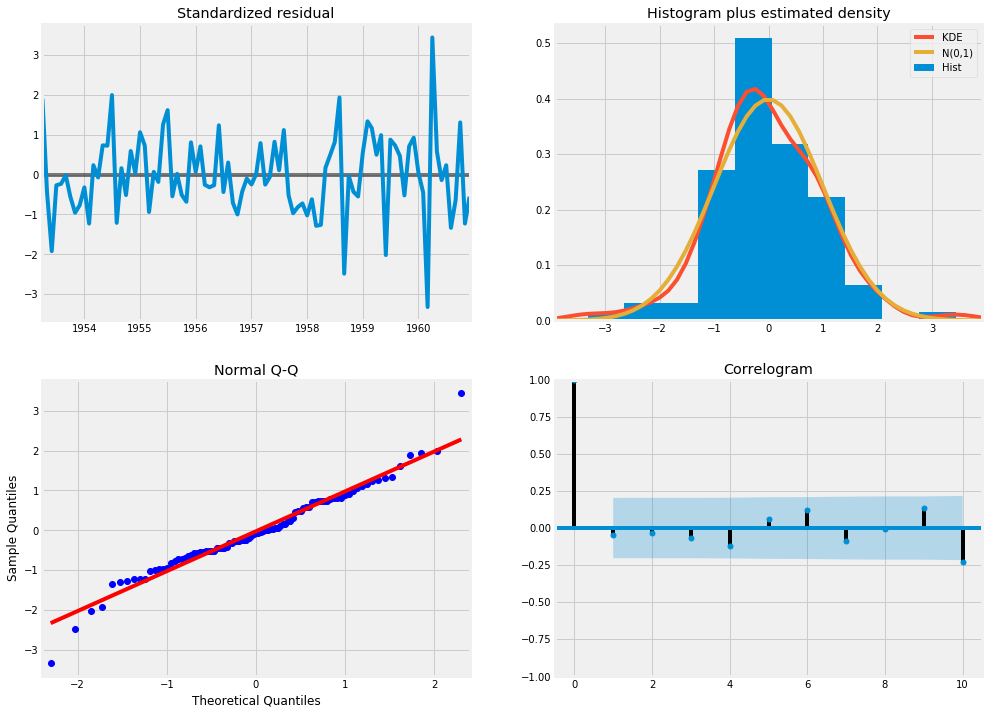

In [11]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Plot one-step ahead forecast

In [12]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

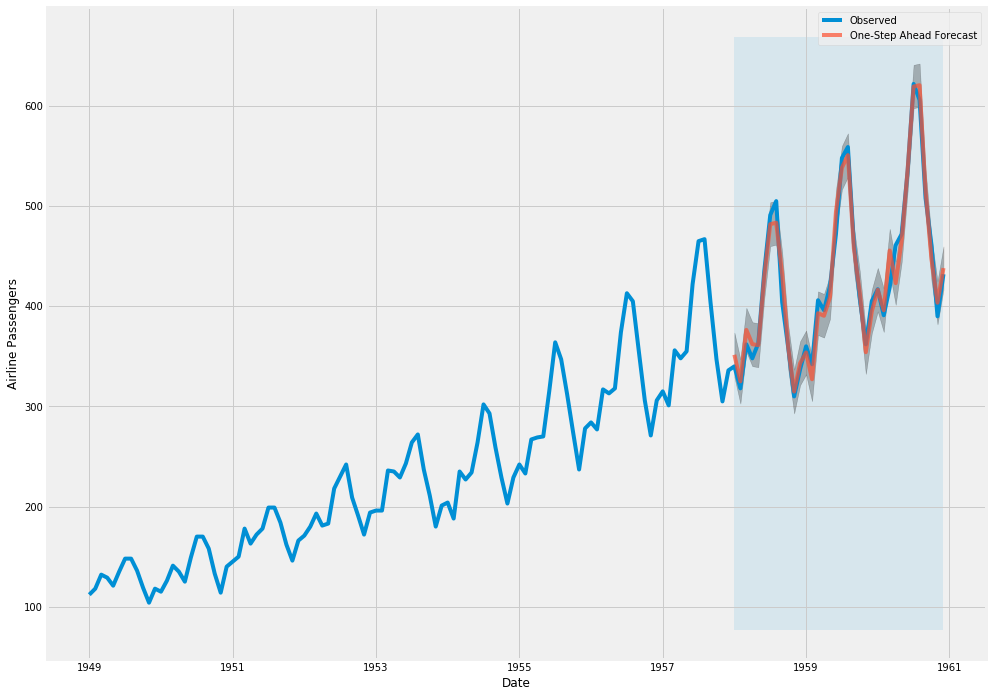

In [13]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [14]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81


# Plot dynamic forecast

In [15]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

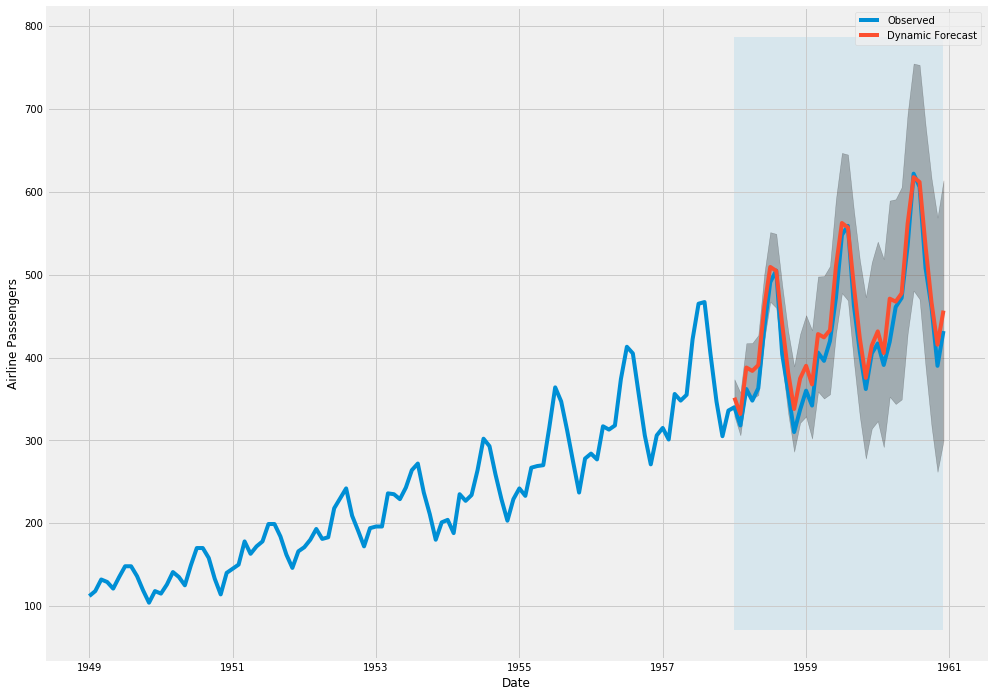

In [16]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [17]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 551.55


# Plot 2-year forecast

In [18]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

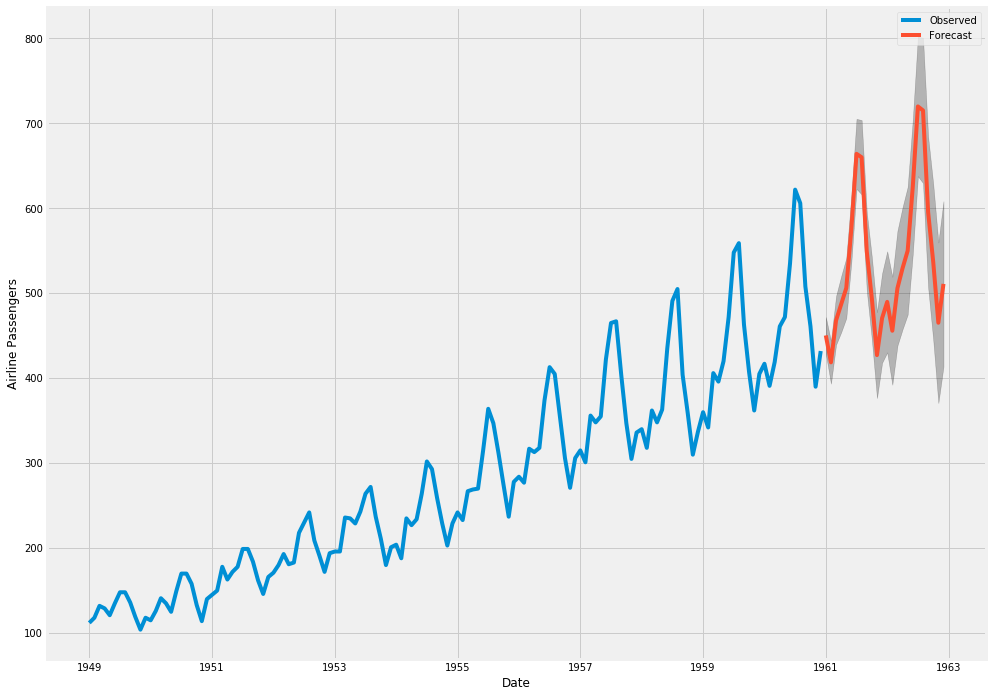

In [19]:
ax = y.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()